In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from readable_number import ReadableNumber

In [2]:
nyc_taxi = pd.read_csv('./Dataset/2017 Yellow Taxi Trip Data.csv')

In [3]:
nyc_taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
nyc_taxi.size

408582

There are 4,08,582 values in the dataset.

In [5]:
nyc_taxi.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

The dataset has 22,699 records. There are no NULL values.

There is an unknown column `Unnamed: 0`. This could be the `ID` column described in the data dictionary which is missing here.

Datetime columns (`tpep_pickup_datetime` and `tpep_dropoff_datetime`) are represented as `object` data type.

Categorical variables such as `VendorID`, `RatecodeID`, and `payment_type` are represented as `int`. We will have to be careful when performing aggregations on these columns.

In [6]:
nyc_taxi.duplicated().sum()

np.int64(0)

There are no duplicate records.

In [7]:
nyc_taxi.nunique()

Unnamed: 0               22699
VendorID                     2
tpep_pickup_datetime     22687
tpep_dropoff_datetime    22688
passenger_count              7
trip_distance             1545
RatecodeID                   6
store_and_fwd_flag           2
PULocationID               152
DOLocationID               216
payment_type                 4
fare_amount                185
extra                        6
mta_tax                      3
tip_amount                 742
tolls_amount                38
improvement_surcharge        3
total_amount              1369
dtype: int64

In [8]:
cat_cols = ['VendorID', 'RatecodeID', 'payment_type']
for col in cat_cols:
    print(col, nyc_taxi[col].unique())

VendorID [2 1]
RatecodeID [ 1  2  5  3  4 99]
payment_type [1 2 3 4]


Some records have a `RatecodeID` of 99. This represents an unknown value.

In [9]:
nyc_taxi[nyc_taxi['RatecodeID']==99]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12501,31724098,1,04/18/2017 5:47:58 PM,04/18/2017 5:47:58 PM,0,0.0,99,N,264,264,1,77.2,0.0,0.5,0.0,0.0,0.3,78.0


There is one record with unknown value for `RatecodeID` (99).

In [10]:
nyc_taxi['VendorID'] = nyc_taxi['VendorID'].astype('category')
nyc_taxi['RatecodeID'] = nyc_taxi['RatecodeID'].astype('category')
nyc_taxi['payment_type'] = nyc_taxi['payment_type'].astype('category')

In [11]:
nyc_taxi['VendorID'].dtype

CategoricalDtype(categories=[1, 2], ordered=False, categories_dtype=int64)

In [12]:
nyc_taxi['RatecodeID'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 99], ordered=False, categories_dtype=int64)

In [13]:
nyc_taxi['payment_type'].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False, categories_dtype=int64)

In [14]:
nyc_taxi['tpep_pickup_datetime'] = pd.to_datetime(nyc_taxi['tpep_pickup_datetime'])
nyc_taxi['tpep_dropoff_datetime'] = pd.to_datetime(nyc_taxi['tpep_dropoff_datetime'])

In [15]:
nyc_taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [16]:
nyc_taxi.describe()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,162.412353,161.527997,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
min,1.212700e+04,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,114.000000,112.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,162.000000,162.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,233.000000,233.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,265.000000,265.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,3.274493e+07,NaN,NaN,1.285231,3.653171,66.633373,70.139691,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295


The maximum value for `trip_distance` is around 34 miles. This is very high when compared with other rides which were mostly between 1 to 3 miles. 
Also, some rides had a `trip_distance` of 0 miles. This is possible when the passenger cancels the booking before the trip starts. But, it is better to further investigate these values.

The highest `fare_amount` is around \\$1000 which is also very high than rest of the trips. Also, there are negative values which need to be investigated.

The maximum values for `tip_amount`, and `tolls_amount` are also very high.

In [17]:
nyc_taxi.sort_values(by='trip_distance', ascending=False).head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,2017-09-14 13:44:44,2017-09-14 14:34:29,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,2017-05-15 08:11:34,2017-05-15 09:03:16,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,2017-06-16 18:51:20,2017-06-16 19:41:42,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


It seems that there were some rides with `trip_distance` of around 30 miles. 
These values align with our initial observation of highest value being around 34 miles.

In [18]:
nyc_taxi.sort_values(by='fare_amount', ascending=False).head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
3582,111653084,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
1928,51087145,1,2017-06-16 18:30:08,2017-06-16 19:18:50,2,12.50,5,N,211,265,1,120.00,0.0,0.0,5.00,12.50,0.3,137.80


The first two records have significantly higher `fare_amount` than others. The `trip_distance` is also very low for these records.

It is clear that the longest trips are not necessarily the most expensive ones.

In [19]:
nyc_taxi['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

According to the data dictionary, the payment method was encoded as:

1 = Credit card  
2 = Cash  
3 = No charge  
4 = Dispute  
5 = Unknown  
6 = Voided trip

In [20]:
print(f"Average Credit Card Tip Amount: {np.round(nyc_taxi[nyc_taxi['payment_type'] == 1]['tip_amount'].mean(), 2)}")
print(f"Average Cash Tip Amount: {np.round(nyc_taxi[nyc_taxi['payment_type'] == 2]['tip_amount'].mean(), 2)}")

Average Credit Card Tip Amount: 2.73
Average Cash Tip Amount: 0.0


The average tip amount for trips paid for with cash was \\$0. It is not surprising since the dataset doesn't contains cash tips.

In [21]:
set(nyc_taxi[nyc_taxi['payment_type'] == 2]['tip_amount'])

{0.0}

In [22]:
nyc_taxi['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [23]:
nyc_taxi.groupby('VendorID', observed=True)['total_amount'].mean()

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

Vendor 2 had slightly more trips than Vendor 1. However, the average total amount for both vendors was almost same.

In [24]:
df_credit_card_trips = nyc_taxi[nyc_taxi['payment_type']==1]
df_credit_card_trips['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [25]:
df_credit_card_trips = df_credit_card_trips[df_credit_card_trips['passenger_count']!=0]

In [26]:
df_credit_card_trips.groupby('passenger_count')['tip_amount'].mean()

passenger_count
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

**trip_distance**

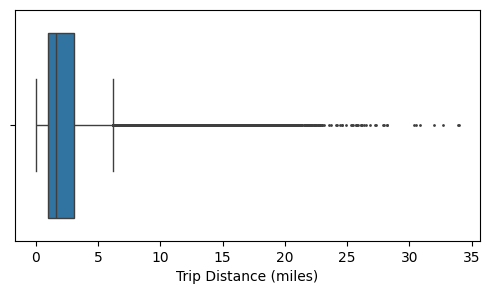

In [27]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=nyc_taxi['trip_distance'], fliersize=1)
plt.xlabel('Trip Distance (miles)')
plt.show()

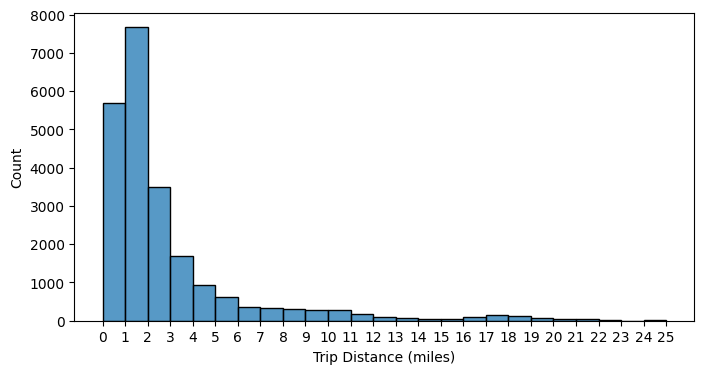

In [28]:
plt.figure(figsize=(8, 4))
ax = sns.histplot(nyc_taxi['trip_distance'], bins=range(0, 26, 1))
ax.set_xticks(range(0, 26, 1))
ax.set_xticklabels(range(0, 26, 1))
plt.xlabel('Trip Distance (miles)')
plt.show()

The majority of trips were less than 2 miles. Some trips were between 2 to 3 miles. However, the number of trips significantly decreases above 3 miles.

**total_amount**

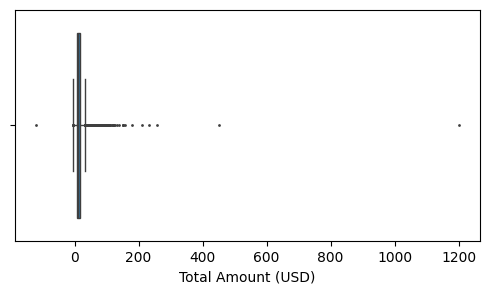

In [29]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=nyc_taxi['total_amount'], fliersize=1)
plt.xlabel('Total Amount (USD)')
plt.show()

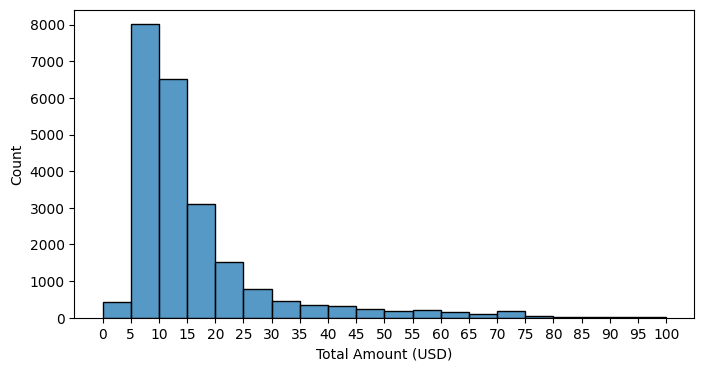

In [30]:
plt.figure(figsize=(8, 4))
ax = sns.histplot(nyc_taxi['total_amount'], bins=range(0, 101, 5))
ax.set_xticks(range(0, 101, 5))
ax.set_xticklabels(range(0, 101, 5))
plt.xlabel('Total Amount (USD)')
plt.show()

Most of the trips had a total fare between \\$5 to \\$15.

**tip_amount**

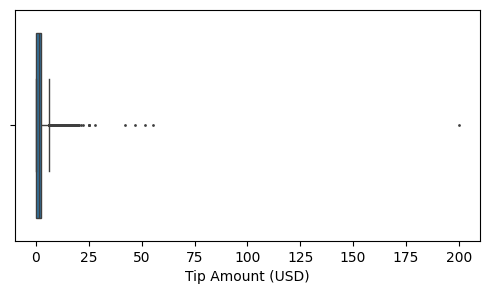

In [31]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=nyc_taxi['tip_amount'], fliersize=1)
plt.xlabel('Tip Amount (USD)')
plt.show()

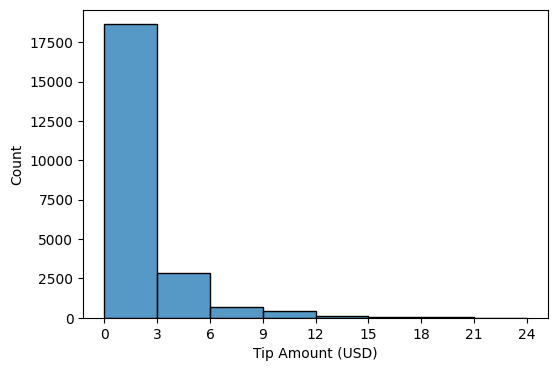

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(nyc_taxi['tip_amount'], bins=range(0, 26, 3))
plt.xticks(range(0, 26, 3))
plt.xlabel('Tip Amount (USD)')
plt.show()

The distribution of tip amounts is right skewed with most tips between 0 to 3 USD.

**tip_amount by vendor**

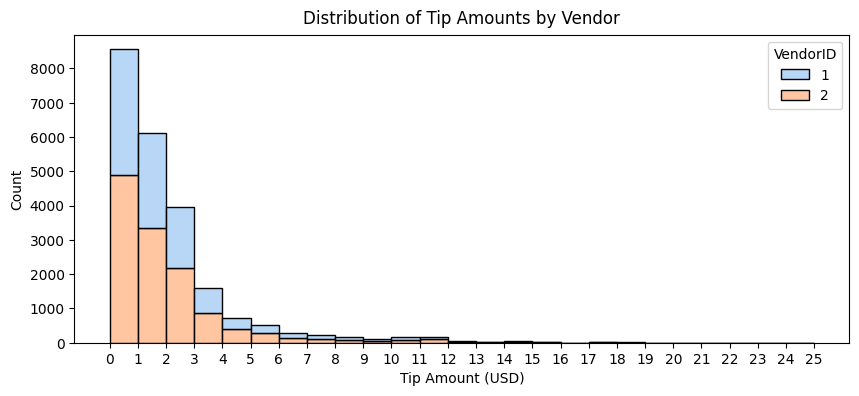

In [33]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(x=nyc_taxi['tip_amount'], hue=nyc_taxi['VendorID'], bins=range(0, 26, 1), multiple='stack', palette='pastel')
ax.set_xticks(range(0, 26, 1))
ax.set_xticklabels(range(0, 26, 1))
plt.title('Distribution of Tip Amounts by Vendor', pad=8)
plt.xlabel('Tip Amount (USD)')
plt.show()

There is no noticable difference in the distribution of tip amounts between the two vendors. Vendor 2 has slightly higher number of trips than Vendor 1 and this proprotions is nearly maintained for all tip amounts.

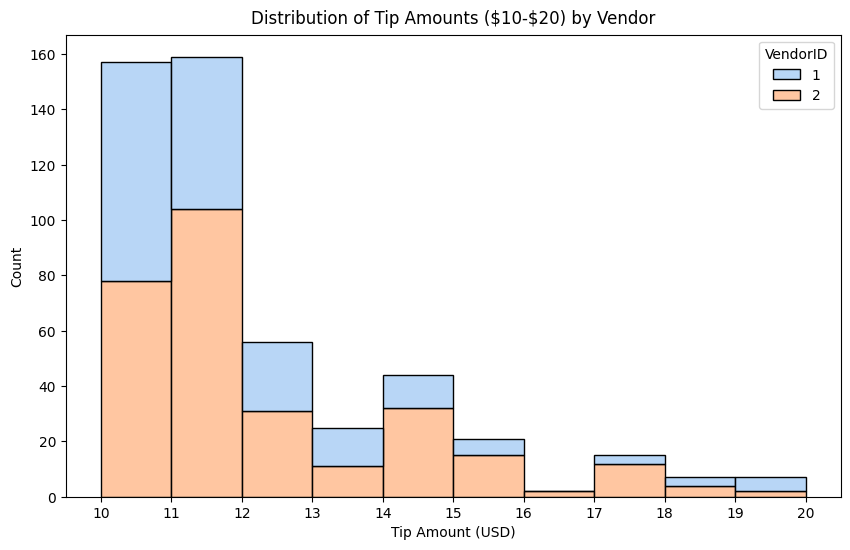

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(x=nyc_taxi['tip_amount'], hue=nyc_taxi['VendorID'], bins=range(10, 21, 1), multiple='stack', palette='pastel')
ax.set_xticks(range(10, 21, 1))
ax.set_xticklabels(range(10, 21, 1))
plt.title(r'Distribution of Tip Amounts (\$10-\$20) by Vendor', pad=8)
plt.xlabel('Tip Amount (USD)')
plt.show()

The proportions are maintained almost evenly except at extreme high values which is not of much importance due to the very low sample size for these amounts.

**Mean tips by passenger count**

In [35]:
nyc_taxi['passenger_count'].unique()

array([6, 1, 2, 4, 5, 3, 0])

In [36]:
nyc_taxi['passenger_count'].value_counts().reset_index(name='trips')

,passenger_count,trips
0,1,16117
1,2,3305
2,5,1143
3,3,953
4,6,693
5,4,455
6,0,33


In [37]:
mean_tip_by_passenger_count = nyc_taxi.groupby(['passenger_count'])['tip_amount'].mean()
mean_tip_by_passenger_count.reset_index(name='Mean Tip Amount')

,passenger_count,Mean Tip Amount
0,0,2.135758
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


In [38]:
mean_tip_by_passenger_count = mean_tip_by_passenger_count[1:]

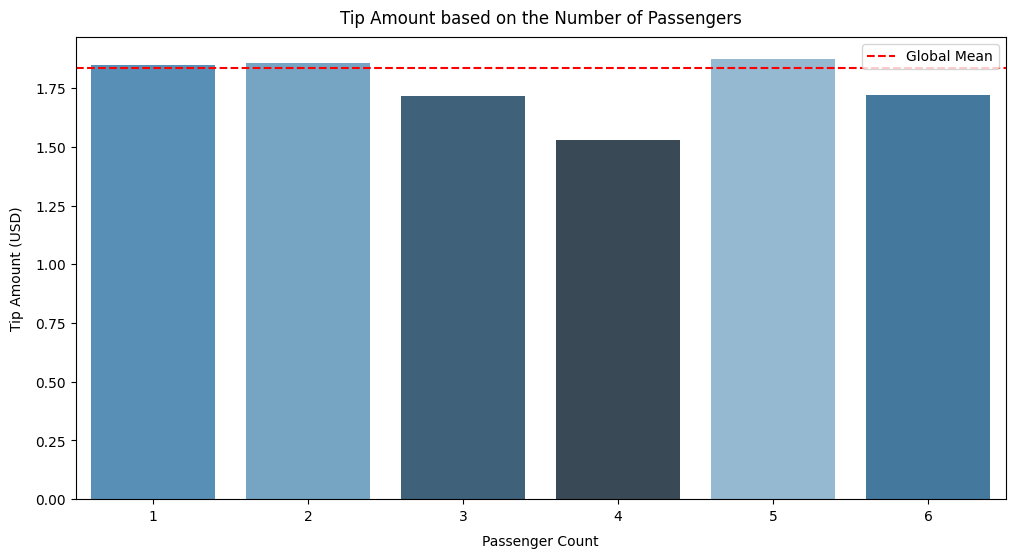

In [39]:
plt.figure(figsize=(12, 6))

rank = mean_tip_by_passenger_count.argsort().argsort()
pal = sns.color_palette("Blues_d", len(mean_tip_by_passenger_count))
ax = sns.barplot(x=mean_tip_by_passenger_count.index, y=mean_tip_by_passenger_count, 
                 hue=mean_tip_by_passenger_count.index, palette=list(np.array(pal[::-1])[rank]))
line = ax.axhline(nyc_taxi['tip_amount'].mean(), ls='--', color='red', label='Global Mean')
ax.legend_.remove()
ax.legend(handles=[line])

plt.title('Tip Amount based on the Number of Passengers', pad=10)
plt.xlabel('Passenger Count', labelpad=8)
plt.ylabel('Tip Amount (USD)', labelpad=8)
plt.show()

The average tip amount varies little by passenger counts. Although there is a noticeable difference for trips with 4 passengers, these trips are very infrequent.

In [40]:
nyc_taxi['month'] = nyc_taxi['tpep_pickup_datetime'].dt.month_name()
nyc_taxi['day'] = nyc_taxi['tpep_pickup_datetime'].dt.day_name()

In [41]:
nyc_taxi.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday


**Monthly Trips Count**

In [42]:
monthly_trips = nyc_taxi['month'].value_counts()
monthly_trips 

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [43]:
calendar_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [44]:
monthly_trips = monthly_trips.reindex(index=calendar_months)
monthly_trips 

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

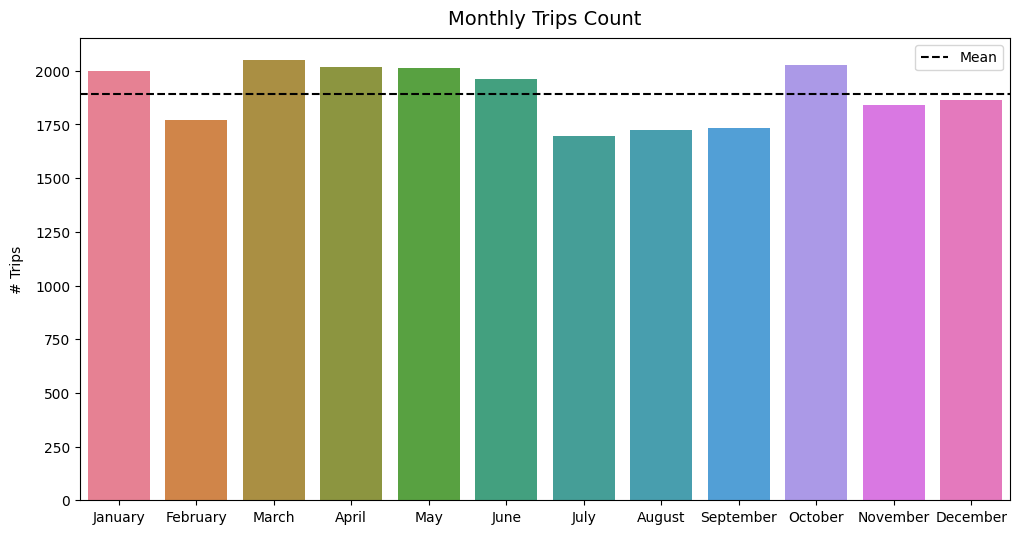

In [45]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_trips.index, y=monthly_trips, hue=monthly_trips.index)
ax.axhline(monthly_trips.mean(), ls='--', color='black', label='Mean')
ax.legend()

plt.title('Monthly Trips Count', fontsize=14, pad=10)
plt.xlabel('')
plt.ylabel('# Trips', labelpad=8)
plt.show()

Monthly trips are fairly consistent with noticable dips in the months of July, August, September, and February.

**Trips Count by Day**

In [46]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trips = nyc_taxi['day'].value_counts().reindex(index=days_order)
daily_trips

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

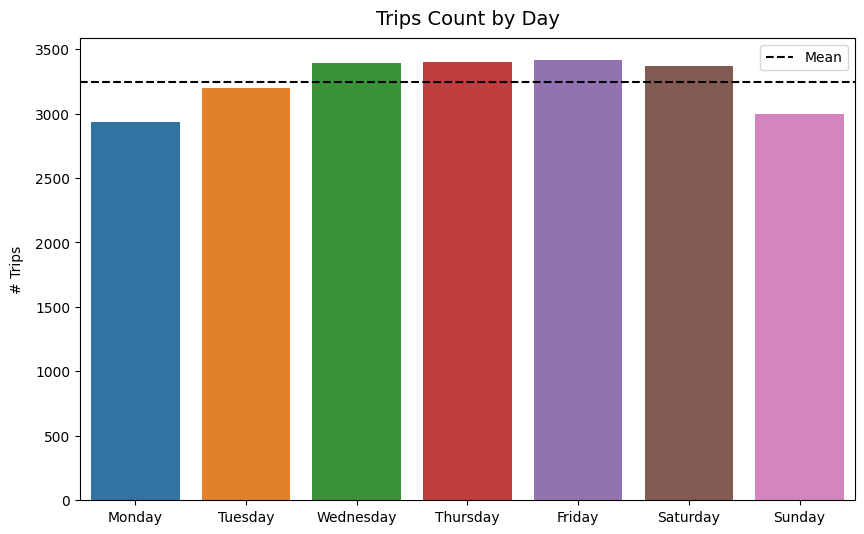

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=daily_trips.index, y=daily_trips, hue=daily_trips.index)
ax.axhline(daily_trips.mean(), ls='--', color='black', label='Mean')
ax.legend()

plt.title('Trips Count by Day', fontsize=14, pad=10)
plt.xlabel('')
plt.ylabel('# Trips', labelpad=8)
plt.show()

Surpisingly, the number of trips were highest from Wednesday to Saturday, while Sunday and Monday had the lowest trips.

**Revenue by Day of Week**

In [48]:
daily_revenue = nyc_taxi.groupby('day')['total_amount'].sum().reindex(index=days_order)
daily_revenue

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

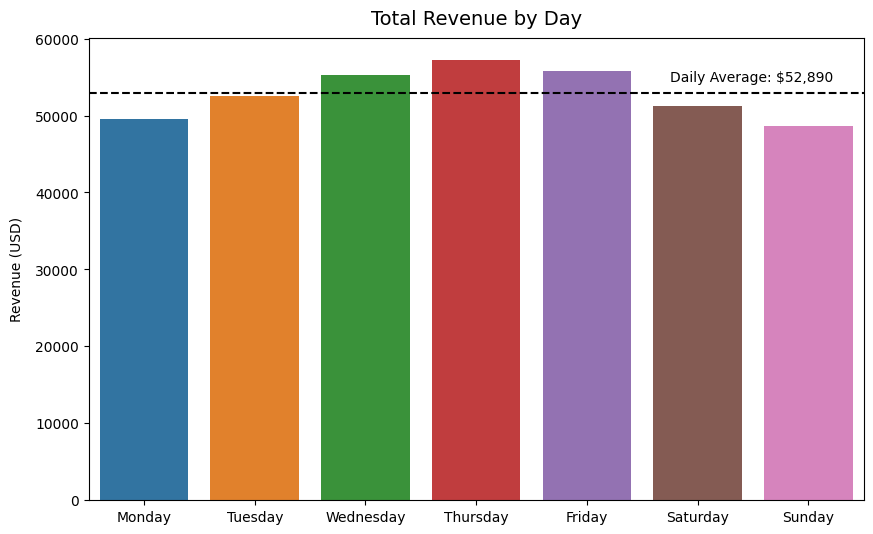

In [49]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=daily_revenue.index, y=daily_revenue, hue=daily_revenue.index)
ax.axhline(daily_revenue.mean(), ls='--', color='black', label='Mean Revenue')
ax.annotate(f"Daily Average: ${ReadableNumber(int(np.round(daily_revenue.mean(), 0)))}", xy=(4.75, daily_revenue.mean()+1500))

plt.title('Total Revenue by Day', fontsize=14, pad=10)
plt.xlabel('')
plt.ylabel('Revenue (USD)', labelpad=8)
plt.show()

Thursday had the highest gross revenue of all days, while Sunday and Monday had the least. <br>
Interestingly, although Saturday had only 35 fewer rides than Thursday, the gross revenue was ~$6,000 less than that of Thursday &mdash; which is more than 10% drop.

**Monthly Revenue**

In [50]:
monthly_revenue = nyc_taxi.groupby('month')['total_amount'].sum().reindex(index=calendar_months)
monthly_revenue

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

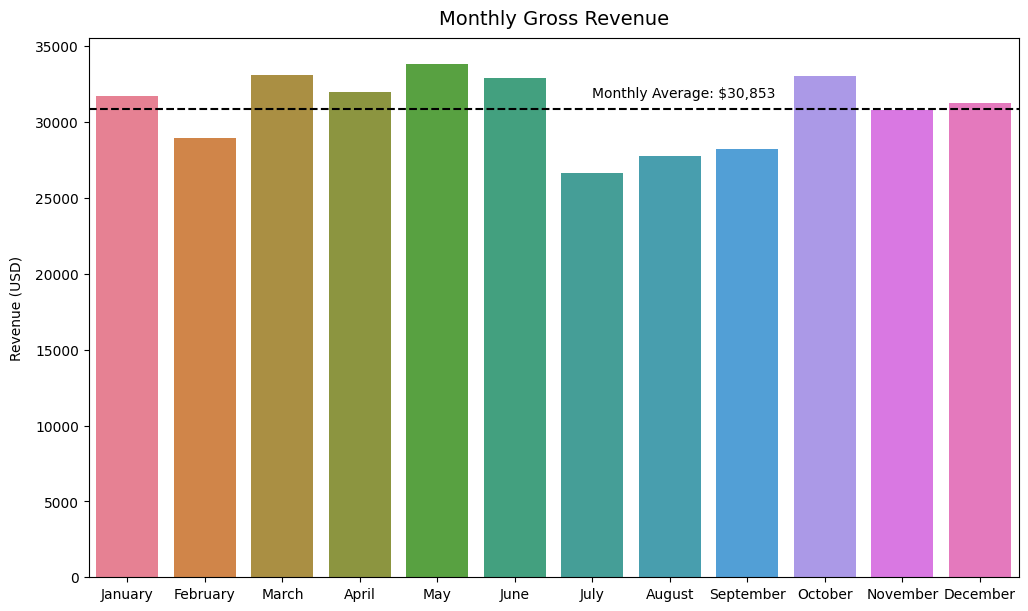

In [51]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=monthly_revenue.index, y=monthly_revenue, hue=monthly_revenue.index)
ax.axhline(monthly_revenue.mean(), ls='--', color='black', label='Monthly mean')
ax.annotate(f"Monthly Average: ${ReadableNumber(int(np.round(monthly_revenue.mean(), 0)))}", xy=(6, monthly_revenue.mean()+750))

plt.title('Monthly Gross Revenue', fontsize=14, pad=10)
plt.xlabel('')
plt.ylabel('Revenue (USD)', labelpad=8)
plt.show()

Monthly revenue follows the same distribution as monthly rides with noticable dips in July, August, September and also in February.

**Trip Distance by Dropoff Location**

In [52]:
nyc_taxi['DOLocationID'].nunique()

216

In [53]:
mean_distance_by_DO = nyc_taxi.groupby('DOLocationID')['trip_distance'].mean().sort_values().reset_index(name='mean_distance')
mean_distance_by_DO['DOLocationID_str'] = mean_distance_by_DO['DOLocationID'].map(str)
mean_distance_by_DO

,DOLocationID,mean_distance,DOLocationID_str
0,207,1.200000,207
1,193,1.390556,193
2,237,1.555494,237
3,234,1.727806,234
4,137,1.818852,137
...,...,...,...
211,51,17.310000,51
212,11,17.945000,11
213,210,20.500000,210
214,29,21.650000,29


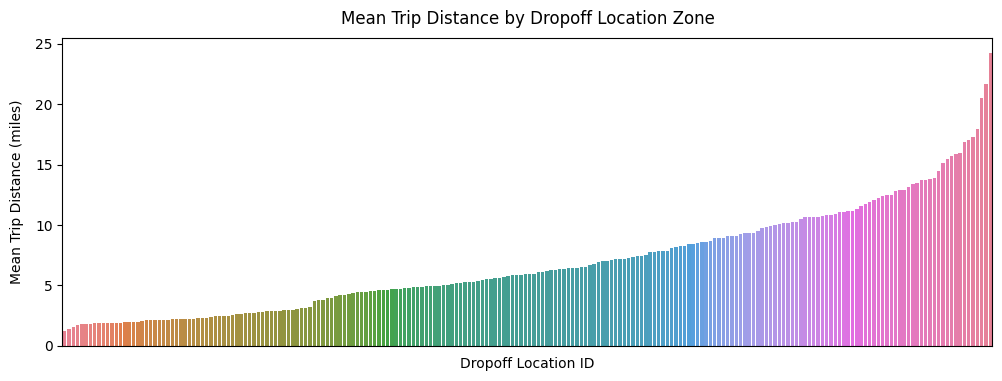

In [54]:
plt.figure(figsize=(12, 4))
pal = sns.color_palette("husl", mean_distance_by_DO['DOLocationID'].count())

ax = sns.barplot(x='DOLocationID_str', y='mean_distance', data=mean_distance_by_DO, 
                 order=mean_distance_by_DO['DOLocationID_str'], 
                 hue=mean_distance_by_DO['DOLocationID_str'], 
                 palette=pal, legend=False)
ax.set_xticklabels([])
ax.set_xticks([])

plt.title('Mean Trip Distance by Dropoff Location Zone', pad=10)
plt.xlabel('Dropoff Location ID', labelpad=8)
plt.ylabel('Mean Trip Distance (miles)', labelpad=8)
plt.show()

This plot shows a characteristic curve that resembles the cumulative density function of a normal distribution.
It indicates that drop-off locations are fairly spread out across the area. 
Since geographic coordinates are not included in the dataset, this plot helps infer the distribution indirectly.

To confirm this conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by drop-off point and calculate the mean distance between that drop-off point and all other points it was paired with
4. Plot the mean distance for each unique drop-off point

In [55]:
np.random.seed(0)
test_locations = np.round(np.random.normal(10, 5, (3000, 2)), 1)
mid = int(len(test_locations)/2)  
pickup = test_locations[:mid]      
dropoff = test_locations[mid:]        

distances = (dropoff - pickup)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

test_df = pd.DataFrame({'pickup': [tuple(x) for x in pickup.tolist()],
                   'dropoff': [tuple(x) for x in dropoff.tolist()],
                   'distance': distances})
distance_by_test_dropoffs = test_df.groupby('dropoff')['distance'].mean().reset_index(name='mean_distance')
distance_by_test_dropoffs = distance_by_test_dropoffs.sort_values(by='mean_distance')

In [56]:
distance_by_test_dropoffs

,dropoff,mean_distance
1022,"(12.4, 12.0)",0.300000
1236,"(15.0, 7.1)",0.316228
1039,"(12.7, 6.0)",0.538516
1160,"(14.1, 9.1)",0.583095
903,"(11.3, 5.5)",0.640312
...,...,...
139,"(3.3, -7.0)",23.482760
874,"(11.1, -4.5)",23.621177
1443,"(20.6, 17.0)",24.232416
1275,"(15.4, 18.7)",24.280033


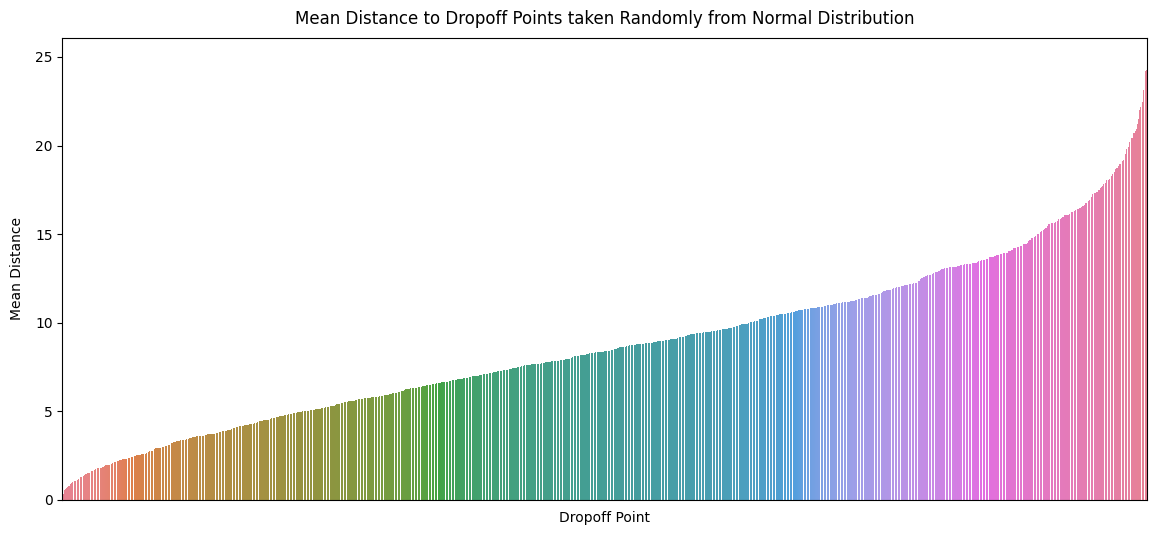

In [57]:
distance_by_test_dropoffs['dropoff_str'] = distance_by_test_dropoffs['dropoff'].map(str)

plt.figure(figsize=(14,6))
pal = sns.color_palette("husl", distance_by_test_dropoffs['dropoff_str'].count())

ax = sns.barplot(x='dropoff_str', y='mean_distance', data=distance_by_test_dropoffs,
                 order=distance_by_test_dropoffs['dropoff_str'], hue=distance_by_test_dropoffs['dropoff_str'],
                palette=pal, legend=False)
ax.set_xticklabels([])
ax.set_xticks([])

ax.set_title('Mean Distance to Dropoff Points taken Randomly from Normal Distribution', pad=10)
ax.set_xlabel('Dropoff Point', labelpad=8)
ax.set_ylabel('Mean Distance', labelpad=8)
plt.show()

The shape of this plot is very similar to that of the average trip distance to each drop-off location. This reveals that the drop-off locations in the nyc_trips dataset are evenly distributed geographically. 

It is important to note that this plot shows the trip distribution geographically and *not* the number of trips at these locations.
Let's examine if there was an even distribution of *rides* to each drop-off point. 

**Rides by Dropoff Location**

In [58]:
nyc_taxi['DOLocationID'].max() - len(set(nyc_taxi['DOLocationID']))

49

There are 49 numbers that do not represent a drop-off location. 

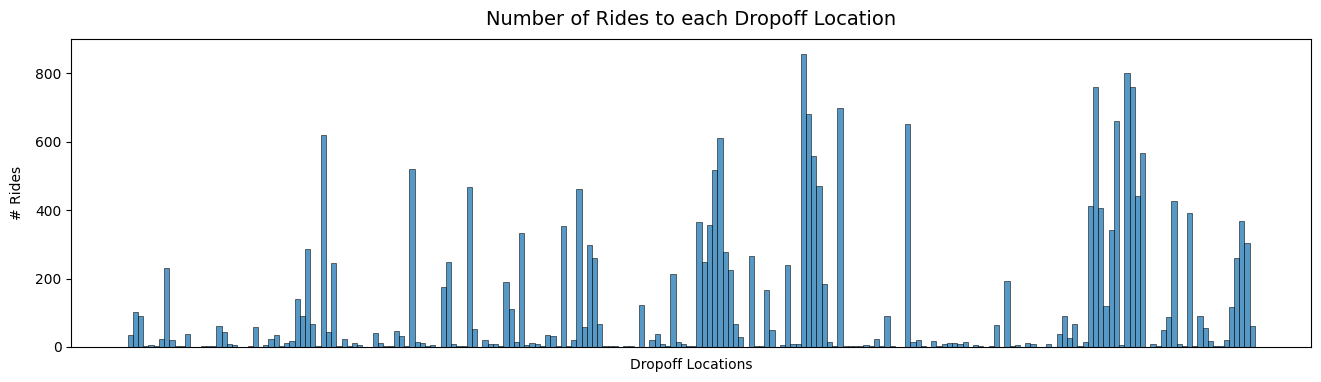

In [59]:
sorted_dropoff_IDs = nyc_taxi['DOLocationID'].sort_values()
sorted_dropoff_IDs = sorted_dropoff_IDs.astype('str')

plt.figure(figsize=(16,4))

sns.histplot(sorted_dropoff_IDs, bins=range(0, nyc_taxi['DOLocationID'].max()+1, 1))
plt.xticks([])

plt.title('Number of Rides to each Dropoff Location', fontsize=14, pad=10)
plt.xlabel('Dropoff Locations', labelpad=8)
plt.ylabel('# Rides', labelpad=8)
plt.show()

The number of rides is very disproportionate across different drop-off locations. Some areas receive very high traffic, while all other sites see relatively few trips. <br>
These high-traffic locations are likely to be near popular tourist attractions. 

It would be helpful to know the location each ID corresponds with, which is unfortunately not present in the data.

**Trip Duration**

In [60]:
nyc_taxi['duration'] = (nyc_taxi['tpep_dropoff_datetime'] - nyc_taxi['tpep_pickup_datetime'])/np.timedelta64(1, 'm')

In [61]:
nyc_taxi.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.200000


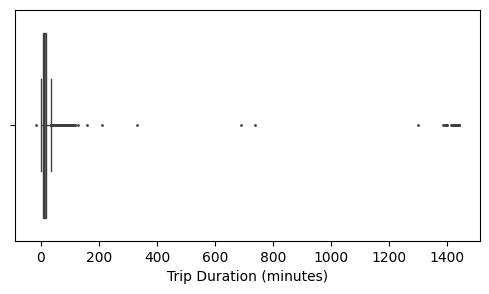

In [62]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=nyc_taxi['duration'], fliersize=1)
plt.xlabel('Trip Duration (minutes)')
plt.show()

In [63]:
nyc_taxi[nyc_taxi['tpep_pickup_datetime'] > nyc_taxi['tpep_dropoff_datetime']]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
9356,93542707,1,2017-11-05 01:23:08,2017-11-05 01:06:09,1,5.7,1,N,161,157,...,28.0,0.5,0.5,0.0,0.0,0.3,29.3,November,Sunday,-16.983333


There is a trip with `tpep_pickup_datetime` value greater than `tpep_dropoff_datetime`. This isn't possible.

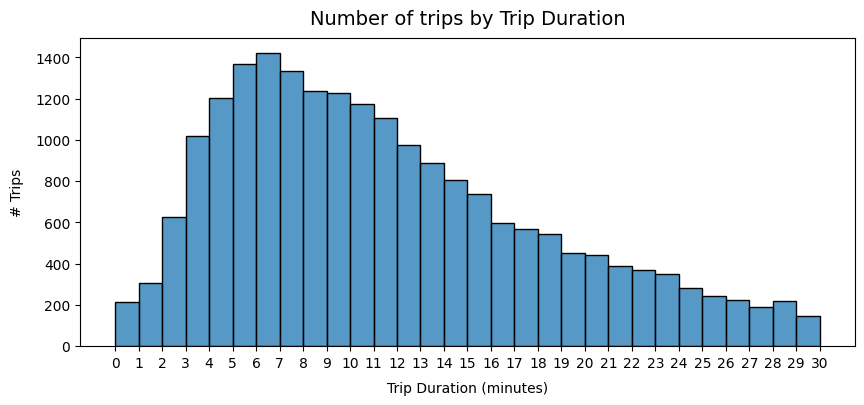

In [64]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(x=nyc_taxi['duration'], bins=range(0, 31, 1))
ax.set_xticks(range(0, 31, 1))
ax.set_xticklabels(range(0, 31, 1))
plt.xlabel('Trip Duration (minutes)', labelpad=8)
plt.ylabel('# Trips', labelpad=8)
plt.title('Number of trips by Trip Duration', fontsize=14, pad=10)
plt.show()

Most of the trips are between 3 to 12 minutes.

**Trip Distance and Total Amount**

In [65]:
non_negative_total_fare = nyc_taxi[nyc_taxi['total_amount']>=0]
non_negative_total_fare[['trip_distance', 'total_amount']].corr()

,trip_distance,total_amount
trip_distance,1.00000,0.76808
total_amount,0.76808,1.00000


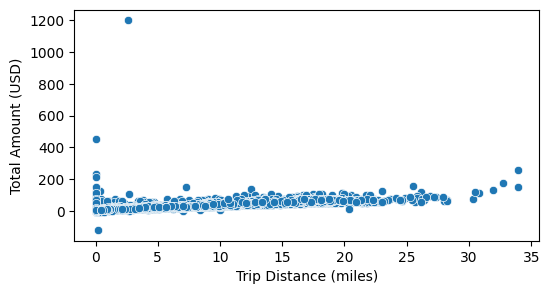

In [66]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='trip_distance', y='total_amount', data=nyc_taxi)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount (USD)')
plt.show()

There is a strong correlation between trip distance and total amount. However, certain trips with `trip_distance` of 0 miles have non-zero values for `total_amount` and there are certain negative values for `total_amount`. 

In [67]:
pd.set_option('display.max_columns', None)
nyc_taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,16.716667


In [68]:
df = nyc_taxi[(nyc_taxi['total_amount']>=0) & (nyc_taxi['duration'] >= 0)]

In [69]:
df[['trip_distance', 'total_amount', 'duration']].corr()

,trip_distance,total_amount,duration
trip_distance,1.000000,0.768074,0.156002
total_amount,0.768074,1.000000,0.136290
duration,0.156002,0.136290,1.000000


Surprisingly, there is very weak correlation between `total_amount` and trip `duration` and between `trip_distance` and `duration`.